In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
Df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
Df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [4]:
Df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
#Converting variables to category which do not have integer type properties
col=['Education', 'Securities Account', 'CD Account', 'Online','CreditCard']
Df[col] = Df[col].astype('category')
Df.drop(['ID','ZIP Code'],axis=1 ,inplace=True)

In [6]:
Df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

Text(0.5,0,'CCAvg')

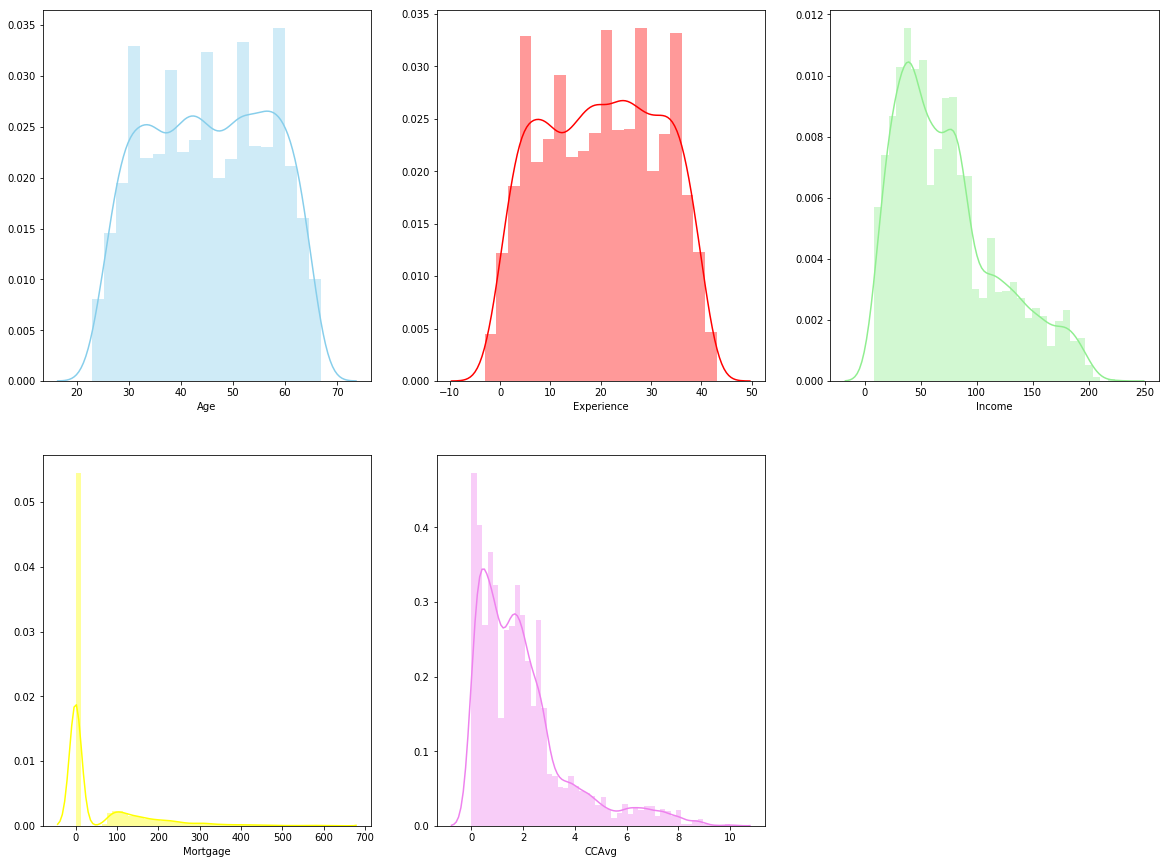

In [7]:
plt.figure(figsize= (20,15))
plt.subplot(2,3,1)
sns.distplot(Df.Age, color='skyblue')
plt.xlabel('Age')

plt.subplot(2,3,2)
sns.distplot(Df.Experience, color='red')
plt.xlabel('Experience')

plt.subplot(2,3,3)
sns.distplot(Df.Income, color='lightgreen')
plt.xlabel('Income')

plt.subplot(2,3,4)
sns.distplot(Df.Mortgage, color='yellow')
plt.xlabel('Mortgage')

plt.subplot(2,3,5)
sns.distplot(Df.CCAvg, color='violet')
plt.xlabel('CCAvg')

None of the distributions are strictly normal but nothing too dramatic to be concerned. A few observations for the variable, Experience with negative values which seems unusual.

Text(0.5,0,'CCAvg')

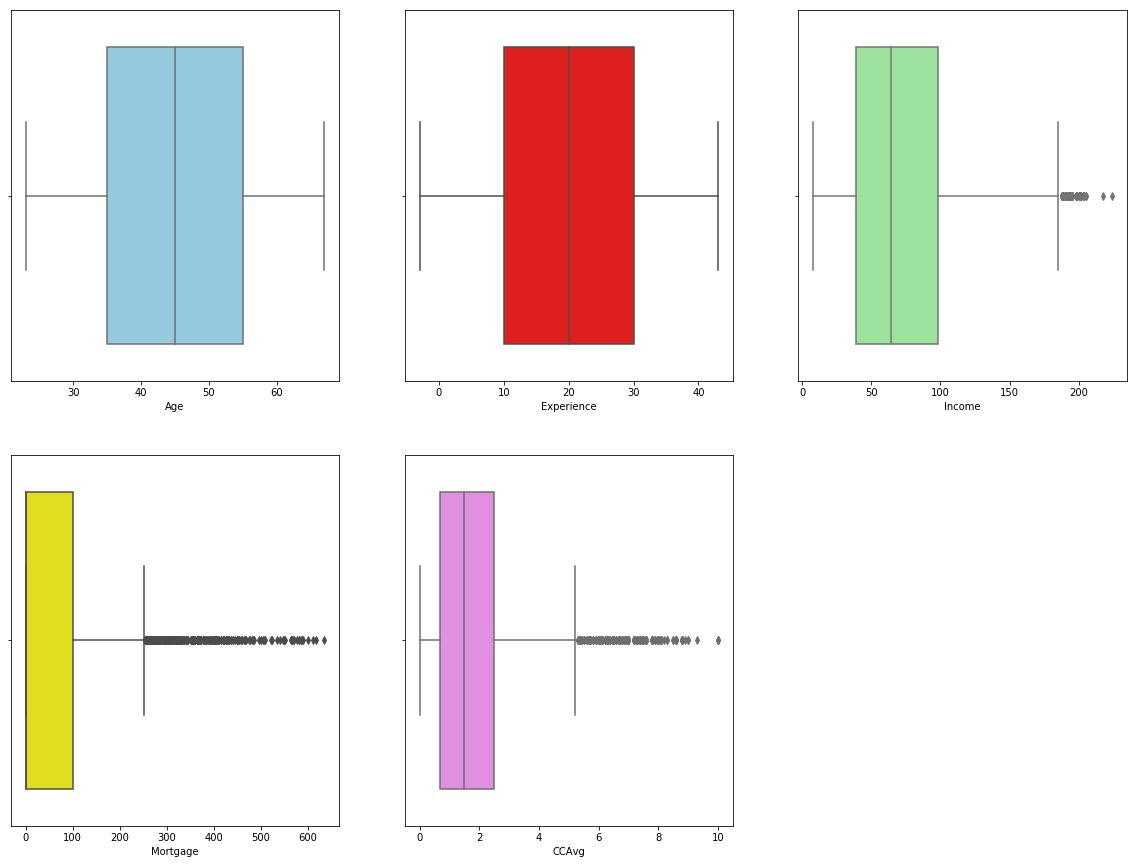

In [8]:
plt.figure(figsize= (20,15))
plt.subplot(2,3,1)
sns.boxplot(Df.Age, color='skyblue')
plt.xlabel('Age')

plt.subplot(2,3,2)
sns.boxplot(Df.Experience, color='red')
plt.xlabel('Experience')

plt.subplot(2,3,3)
sns.boxplot(Df.Income, color='lightgreen')
plt.xlabel('Income')

plt.subplot(2,3,4)
sns.boxplot(Df.Mortgage, color='yellow')
plt.xlabel('Mortgage')

plt.subplot(2,3,5)
sns.boxplot(Df.CCAvg, color='violet')
plt.xlabel('CCAvg')

There are some outliers in some of the numeric variables as can be seen above. May need outlier treatment

In [9]:
# Dealing with the negative values in the Experience variable

In [10]:
Df[Df.Experience<0].Experience.value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [11]:
#Changing the experience to 0 for the ones noted as negative
Df.loc[Df.Experience<0,'Experience']=0

In [12]:
Df['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

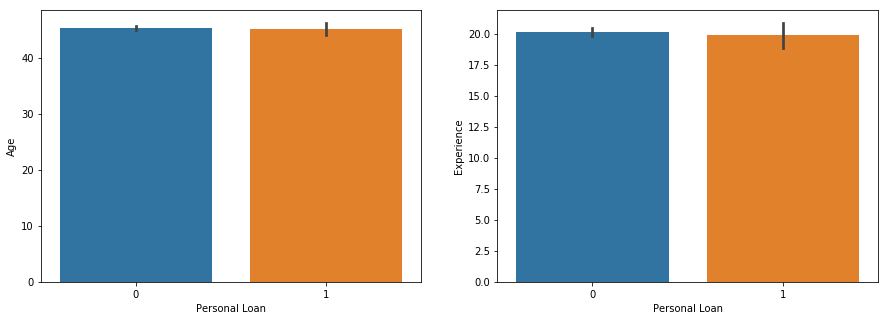

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(Df['Personal Loan'], Df['Age'])
plt.subplot(1,2,2)
sns.barplot(Df['Personal Loan'], Df['Experience'])

Age and Experience individually do not seem to make any difference to a customer accepting or rejecting a loan offer, as can be seen above and below.

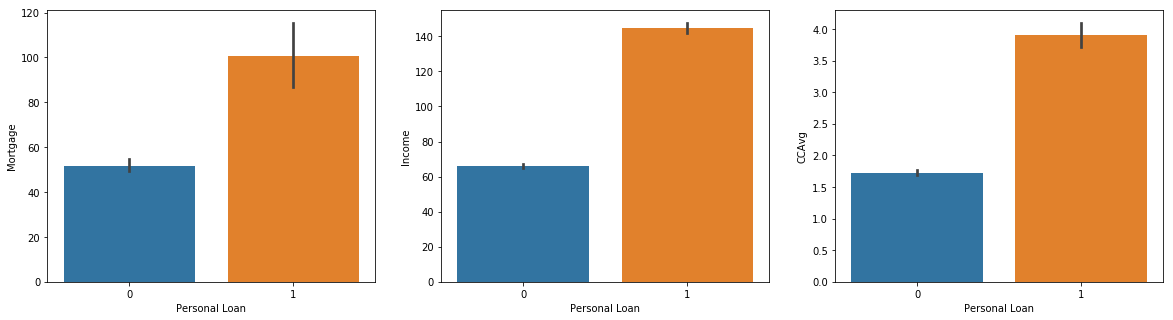

In [14]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(Df['Personal Loan'], Df['Mortgage'])
plt.subplot(1,3,2)
sns.barplot(Df['Personal Loan'], Df['Income'])
plt.subplot(1,3,3)
sns.barplot(Df['Personal Loan'], Df['CCAvg'])

In [15]:
# find all the numeric variables
Df_num=Df.select_dtypes(include=['int64','float64'])
Df_num.drop('Personal Loan', axis=1, inplace=True)

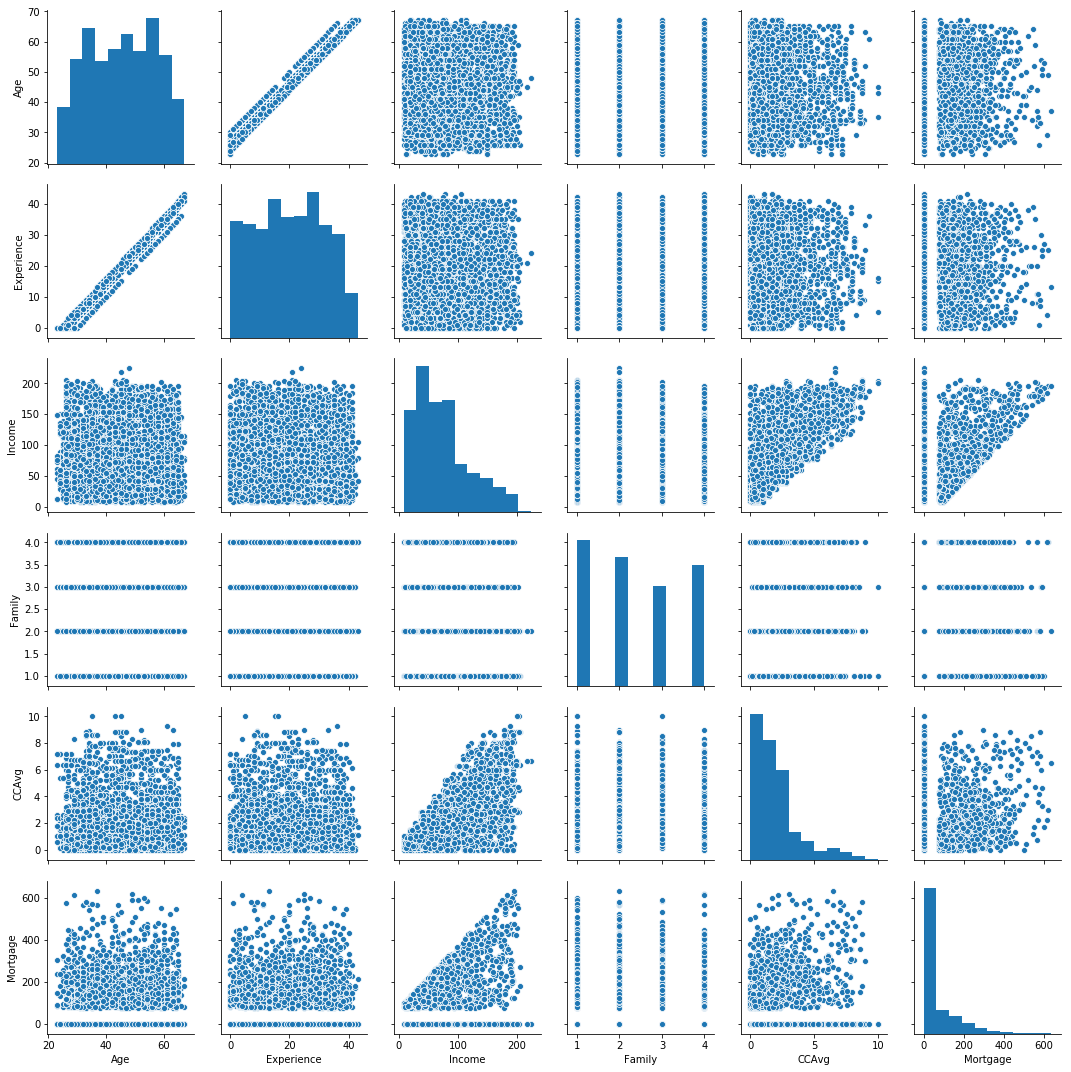

In [16]:
sns.pairplot(Df_num)

Strong correlation between Age and Experience. Family looks like categorical variable.
Income and CCAvg also seem to have a fairly strong positive correlation as can be seen below

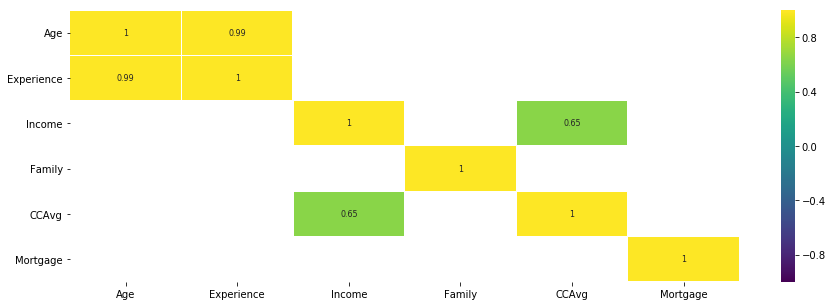

In [17]:
corr=Df_num.corr()
plt.figure(figsize=(15, 5))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8});

In [18]:
Df.select_dtypes('category').columns.tolist()

['Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

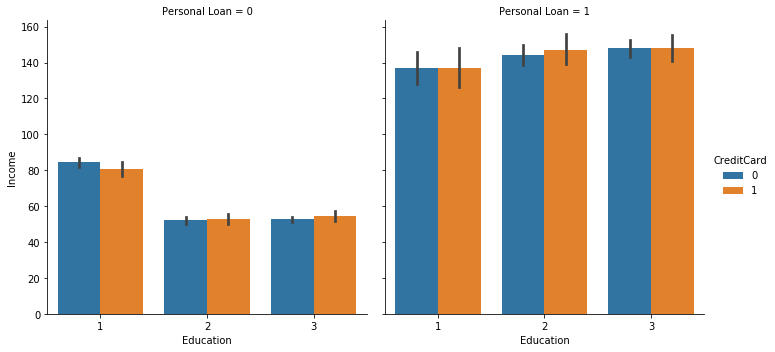

In [19]:
sns.catplot(y='Income', x='Education', kind='bar',col='Personal Loan' , hue='CreditCard',data=Df)

People with Higher Income and Higher Education seem to be ones who are more likely take the loan. Use of CreditCard does not seem to make a significant difference.

In [20]:
pd.crosstab(Df['Personal Loan'],Df['CreditCard'])

CreditCard,0,1
Personal Loan,,
0,3193,1327
1,337,143


Text(0.5,1,'Loan Vs Family Size')

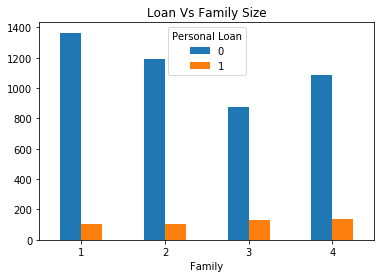

In [21]:
tab=pd.crosstab(Df['Family'], Df['Personal Loan'])
tab1=pd.crosstab(Df['Online'], Df['Personal Loan'])
tab.plot.bar()
plt.xticks(rotation=0)
plt.title("Loan Vs Family Size")

In [22]:
pd.crosstab(Df['Family'], Df['Personal Loan'], normalize='index')

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


Bigger Families seem to have higher probability of taking the loan

Family Size has an effect on customer propensity to take the Personal Loan as the p_value (0.0) < 0.05


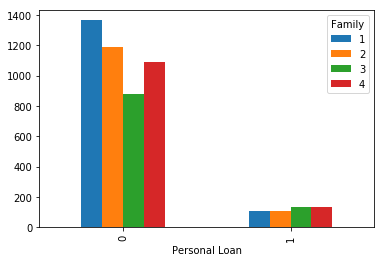

In [23]:
# Chi_square test to check if family size makes any difference to customers taking the loan
Ho = "Familiy Size has no effect on customer propensity to take the Personal Loan" 
Ha = "Family Size has an effect on customer propensity to take the Personal Loan"

crosstab = pd.crosstab(Df['Personal Loan'],Df['Family'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab.plot.bar()

Online banking activity has no effect on customer propensity to take the Personal Loan as the p_value (0.693) > 0.05


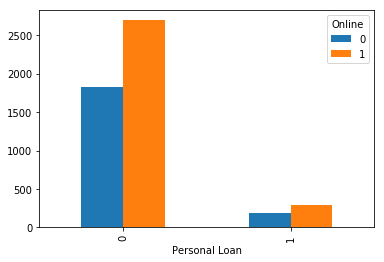

In [24]:
# Chi_square test to check if use of online banking facilities make any difference to customers taking the loan
Ho = "Online banking activity has no effect on customer propensity to take the Personal Loan" 
Ha = "Online banking activity has an effect on customer propensity to take the Personal Loan"

crosstab = pd.crosstab(Df['Personal Loan'],Df['Online'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab.plot.bar()

Online banking activity has no effect on customer propensity to take the Personal Loan as the p_value (0.693) > 0.05


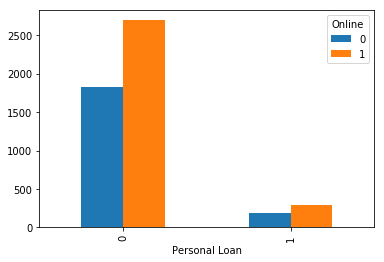

In [25]:
# Chi_square test to check if use of online banking facilities make any difference to customers taking the loan
Ho = "Online banking activity has no effect on customer propensity to take the Personal Loan" 
Ha = "Online banking activity has an effect on customer propensity to take the Personal Loan"

crosstab = pd.crosstab(Df['Personal Loan'],Df['Online'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab.plot.bar()

Possessing Security Account has no effect on customer propensity to take the Personal Loan as the p_value (0.141) > 0.05


(array([0, 1]), <a list of 2 Text xticklabel objects>)

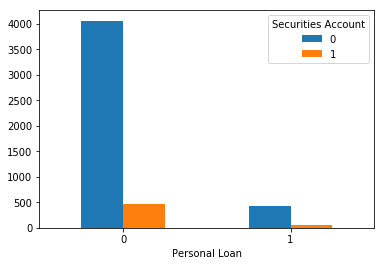

In [26]:
# Chi_square test to check if possessing Security Account makes any difference to customers taking the loan
Ho = "Possessing Security Account has no effect on customer propensity to take the Personal Loan" 
Ha = "Possessing Security Account has an effect on customer propensity to take the Personal Loan"

crosstab = pd.crosstab(Df['Personal Loan'],Df['Securities Account'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab.plot.bar()
plt.xticks(rotation=0)

In [27]:
# Chi_square test to check if the categorical variables individually make any difference to customers taking the loan
for i in np.arange(len(col)):
    crosstab=pd.crosstab(Df['Personal Loan'],Df[col[i]])
    chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
    if p_value > 0.05:
        print(f'{col[i]} individually does not impact customer behaviour as the p_value ({p_value.round(3)}) > 0.05')
    else:
            print(f'{col[i]} individually impacts customer behaviour as the p_value ({p_value.round(3)}) < 0.05')

Education individually impacts customer behaviour as the p_value (0.0) < 0.05
Securities Account individually does not impact customer behaviour as the p_value (0.141) > 0.05
CD Account individually impacts customer behaviour as the p_value (0.0) < 0.05
Online individually does not impact customer behaviour as the p_value (0.693) > 0.05
CreditCard individually does not impact customer behaviour as the p_value (0.884) > 0.05


In [28]:
Df['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [29]:
#Dependent variables highly skewed towards majority class with 90% customers not taking the personal loan.

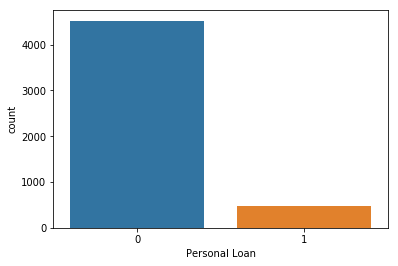

In [30]:
sns.countplot(Df['Personal Loan'])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes

create dummy variables for features with more than 2 levels i.e. family and Education

In [32]:
Temp=Df[['Family','Education']]
Temp['Family']=Temp['Family'].astype('category')
Temp['Education']=Temp['Education'].astype('category')
Temp=pd.get_dummies(Temp,drop_first=True)
Df=pd.concat([Df,Temp], axis=1)

In [33]:
Df.drop(['Family','Education'],axis=1 ,inplace=True)

In [34]:
Df.dtypes

Age                      int64
Experience               int64
Income                   int64
CCAvg                  float64
Mortgage                 int64
Personal Loan            int64
Securities Account    category
CD Account            category
Online                category
CreditCard            category
Family_2                 uint8
Family_3                 uint8
Family_4                 uint8
Education_2              uint8
Education_3              uint8
dtype: object

In [35]:
# Splitting of data to train and test
X=Df.drop('Personal Loan', axis=1)
Y=Df.loc[:,'Personal Loan']
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.3, random_state=1)

In [85]:
Logistic=LogisticRegression()
Logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [139]:
Coeff=pd.DataFrame(Logistic.coef_).T
Coeff.index=X_train.columns
Coeff.loc['Intercept']=Logistic.intercept_
Coeff

,0
Age,-0.365653
Experience,0.365389
Income,0.053616
CCAvg,0.205180
Mortgage,0.000835
Securities Account,-0.802696
CD Account,2.994969
Online,-0.512043
CreditCard,-0.819831
Family_2,-0.191640


Acc_Train_Log1 : 0.96
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      3169
          1       0.87      0.68      0.76       331

avg / total       0.96      0.96      0.96      3500



Text(0.5,15,'Predicted')

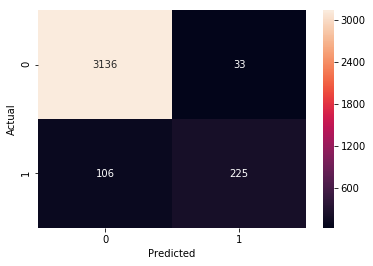

In [87]:
Acc_Train_Log1=accuracy_score(y_train, Logistic.predict(X_train))
CM_Log1=confusion_matrix(y_train,Logistic.predict(X_train))
print("Acc_Train_Log1 : %.2f" %Acc_Train_Log1)
print(classification_report(y_train,Logistic.predict(X_train)))
sns.heatmap(CM_Log1, annot=True, fmt='g')
plt.ylabel("Actual")
plt.xlabel("Predicted")

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1351
          1       0.89      0.60      0.71       149

avg / total       0.95      0.95      0.95      1500

Acc : 0.95


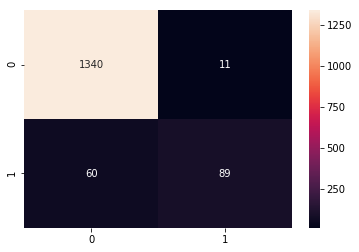

In [88]:
y_pred=Logistic.predict(X_test)
Acc_Test_Log1=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
print("Acc : %.2f" %Acc_Test_Log1)
sns.heatmap(cm, annot=True, fmt='g')

AUC : 0.79


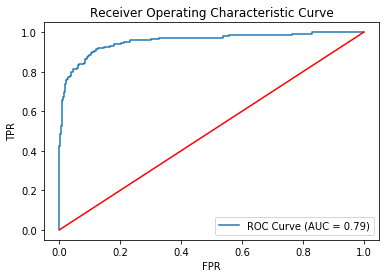

In [89]:
# Sensitivity for class 1 is only 60% which the modeller want to improve upon
Sensitivity_Log1=0.60
y_prob = Logistic.predict_proba(X_test)
AUC_Log1=roc_auc_score(y_test,y_pred)
print("AUC : %.2f" %AUC_Log1)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
plt.plot(fpr, tpr, label="ROC Curve (AUC = %.2f)" %AUC_Log1)
plt.plot([0,1],[0,1],'r-')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")

             precision    recall  f1-score   support

          0       0.97      0.98      0.97      1351
          1       0.77      0.76      0.77       149

avg / total       0.95      0.95      0.95      1500

AUC : 0.87
Acc :0.95


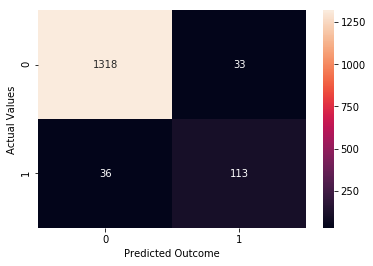

In [90]:
#tune the threshold level to improve sensitivity (recall)
y_flag=y_prob[:,1]>0.25
Acc_Test_Log2=accuracy_score(y_test,y_flag)
cm=confusion_matrix(y_test,y_flag)
print(classification_report(y_test, y_flag))
sns.heatmap(cm, annot=True, fmt='g')
AUC_Log2=roc_auc_score(y_test,y_flag)
print("AUC : %.2f" %AUC_Log2)
print("Acc :%.2f" %Acc_Test_Log2)
plt.xlabel("Predicted Outcome")
plt.ylabel("Actual Values")
Sensitivity_Log2=0.76

In this case study we would love to have the sensitivity (i.e. True Positive or Recall) as high as possible and the false negatives as low as possible. By reducing the threshold to 25% we have a much higher recall as well as a higher AUC. If we further decrease the threshold to less than 25, we get better sensitivity but at the cost of higher false negatives. Hence for a balanced and stable outcome, I chose the threshold of 25%.

In [91]:
# Try logistic using statsmodel package
import statsmodels.api as sm

In [140]:
Logreg=sm.Logit(y_train, sm.add_constant(X_train.astype(float))).fit()
print(Logreg.summary())

Optimization terminated successfully.
         Current function value: 0.107508
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3485
Method:                           MLE   Df Model:                           14
Date:                Sun, 01 Sep 2019   Pseudo R-squ.:                  0.6565
Time:                        17:34:28   Log-Likelihood:                -376.28
converged:                       True   LL-Null:                       -1095.5
                                        LLR p-value:                8.933e-299
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.1804      2.228     -5.916      0.000     -17.547      -8.814
Age 

Text(0.5,1,'Distribution of Predictions')

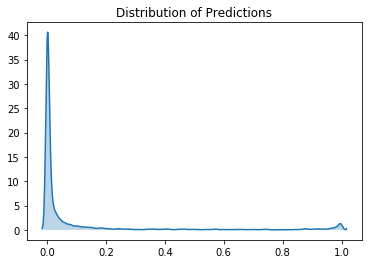

In [93]:
#Examine distribution of prediction
kde_res=sm.nonparametric.KDEUnivariate(Logreg.predict())
kde_res.fit()
plt.plot(kde_res.support, kde_res.density)
plt.fill_between(kde_res.support, kde_res.density, alpha=0.3)
plt.title("Distribution of Predictions")

In [94]:
#Density is highest near 0 which means a lot of customers did not respond to the campaign

In [141]:
y_prob=Logreg.predict(sm.add_constant(X_test.astype(float)))

In [142]:
y_pred=y_prob>0.25 #inference taken from previous iteration
confusion_matrix(y_test,y_pred)

array([[1313,   38],
       [  35,  114]], dtype=int64)

In [143]:
print(classification_report(y_test, y_pred))
Sensitivity_Log3=114/(35+114)
print(Sensitivity_Log3)

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1351
          1       0.75      0.77      0.76       149

avg / total       0.95      0.95      0.95      1500

0.7651006711409396


In [147]:
Coeff=pd.DataFrame(Logreg.params, columns=['Coeff'])
Coeff['Odds']=np.exp(Coeff.Coeff)
Coeff['Prob']=Coeff['Odds']/(Coeff.Odds+1)
Coeff.sort_values(by='Odds', ascending=False)
Coeff['pval']=round(Logreg.pvalues,5)
Coeff[Coeff.pval<0.05]

,Coeff,Odds,Prob,pval
const,-13.180427,0.000002,0.000002,0.00000
Income,0.062727,1.064737,0.515677,0.00000
CCAvg,0.246615,1.279687,0.561343,0.00002
Securities Account,-1.070173,0.342949,0.255370,0.00830
CD Account,3.708357,40.786721,0.976069,0.00000
Online,-0.585626,0.556757,0.357639,0.00447
CreditCard,-0.998598,0.368396,0.269217,0.00021
Family_3,2.488442,12.042498,0.923328,0.00000
Family_4,1.641686,5.163867,0.837764,0.00000
Education_2,4.005818,54.916734,0.982116,0.00000


0.9513333333333334

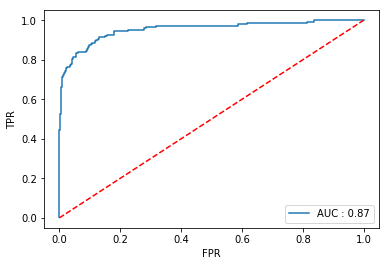

In [98]:
AUC_Log3=roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='AUC : %.2f'%AUC_Log3)
plt.legend(loc='lower right')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot([0,1],[0,1],'r--')
Acc_Log3=accuracy_score(y_test,y_pred)

Acc_Log3

# Try K-Nearest neighbour classifier to fit a model

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [101]:
y_pred=knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
Acc_KNN=accuracy_score(y_test,y_pred)
knn.score(X_test,y_test)
print("Acc for KNN Model: %.2f" %Acc_KNN)
print(classification_report(y_test,y_pred))

[[1303   48]
 [ 100   49]]
Acc for KNN Model: 0.90
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1351
          1       0.51      0.33      0.40       149

avg / total       0.89      0.90      0.89      1500



precision and recall for the class 1 is very poor for the above model. If the model predicts only 33% of the potential 
customers who may take the accurately, it's not going to be very helpful to the company.

In [102]:
List=list(np.arange(1,20))
neigbors=list(filter(lambda x: x%2!=0,List))
Accuracy=[]
AUC_KNN=[]

In [103]:
for n in neigbors:
    knn=KNeighborsClassifier(n_neighbors=n, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    Accuracy.append(acc)
    y_prob=knn.predict_proba(X_test)
    AUC=roc_auc_score(y_test,y_prob[:,1])
    AUC_KNN.append(AUC)

MissClassification=[1-x for x in Accuracy]
MissClassification.index(min(MissClassification))
print("Based on misclassification compariosn, optimal n: %i" %neigbors[MissClassification.index(min(MissClassification))])
print("Based on AUC compariosn, optimal n: %i" %neigbors[AUC_KNN.index(max(AUC_KNN))])

Based on misclassification compariosn, optimal n: 17
Based on AUC compariosn, optimal n: 17


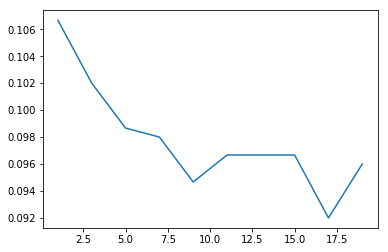

In [104]:
plt.plot(neigbors,MissClassification)

Acc_KNN:0.91


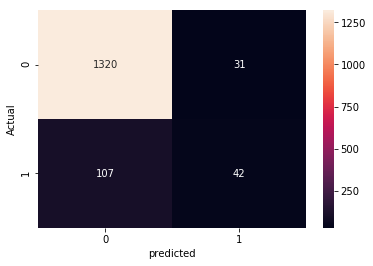

In [105]:
#Final KNN model
KNN=KNeighborsClassifier(n_neighbors=17, metric='euclidean')
KNN.fit(X_train, y_train)
y_pred=KNN.predict(X_test)
Acc_KNN=accuracy_score(y_test,y_pred)
print("Acc_KNN:%.2f"%Acc_KNN)
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="g")
plt.ylabel("Actual")
plt.xlabel("predicted")
Sensitivity_KNN=42/(107+42)

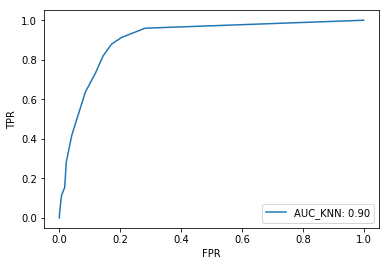

In [106]:
y_prob=KNN.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
AUC_KNN=roc_auc_score(y_test, y_prob)
plt.plot(fpr,tpr, label="AUC_KNN: %.2f" %AUC_KNN)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")

In [107]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.98      0.95      1351
          1       0.58      0.28      0.38       149

avg / total       0.89      0.91      0.89      1500



Quite a few misclassifications for 1. This may not be the best model for predicting potential customers for the personal loan.

# Try Naive bayes

In [108]:
from sklearn.naive_bayes import GaussianNB

In [109]:
NBC=GaussianNB()
NBC.fit(X_train, y_train)
y_pred=NBC.predict(X_test)

In [110]:
Acc_NB=accuracy_score(y_test, y_pred)
print("Accuracy : %.2f" %Acc_NB)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy : 0.88
             precision    recall  f1-score   support

          0       0.95      0.91      0.93      1351
          1       0.41      0.57      0.48       149

avg / total       0.90      0.88      0.88      1500

[[1229  122]
 [  64   85]]


In [111]:
#Poor precision and recall for the minority class 1. Poor predicatability means inability to identify potential cutomers

In [112]:
Sensitivity_NB=85/(64+85)

In [113]:
NBC.predict_proba(X_test)

array([[9.95591524e-01, 4.40847637e-03],
       [9.99857697e-01, 1.42302730e-04],
       [9.99973406e-01, 2.65939786e-05],
       ...,
       [9.99997452e-01, 2.54787442e-06],
       [9.99978531e-01, 2.14689436e-05],
       [9.99985702e-01, 1.42977414e-05]])

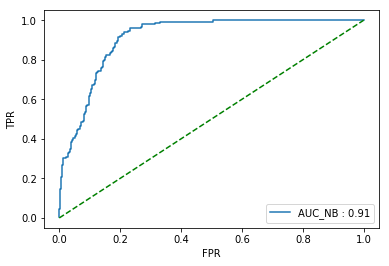

In [114]:
AUC_NB=roc_auc_score(y_test, NBC.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, NBC.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label ="AUC_NB : %.2f"%AUC_NB)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.plot([0,1],[0,1], 'g--')

# Try Support Vector Machine

In [88]:
from sklearn.svm import SVC
Clf=SVC(kernel='poly', degree=2)
Clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [90]:
y_pred=Clf.predict(X_test)
Acc_SVM=accuracy_score(y_test, y_pred)
print("Acc_SVM :%.2f" %Acc_SVM)
print(classification_report(y_test,y_pred))

Acc_SVM :0.97
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      1351
          1       0.88      0.77      0.82       149

avg / total       0.97      0.97      0.97      1500



In [118]:
Comparison={'Accuracy':[Acc_Test_Log1, Acc_Test_Log2, Acc_Log3, Acc_KNN, Acc_NB, 0.97],
           'Area Under Curve':[AUC_Log1, AUC_Log2, AUC_Log3, AUC_KNN, AUC_NB, 'Not calculated as it took too much time'],
           'Sensitivity': [Sensitivity_Log1, Sensitivity_Log2, Sensitivity_Log3, Sensitivity_KNN, Sensitivity_NB, 0.77]}
Comparison = pd.DataFrame(Comparison, index=['LogisticVariant1','LogisticVariant2', 'LogisticVariant3','KNN','NaiveBayes', 'SVM_Poly_Kernel'])
Comparison

,Accuracy,Area Under Curve,Sensitivity
LogisticVariant1,0.952667,0.794587,0.600000
LogisticVariant2,0.954000,0.866981,0.760000
LogisticVariant3,0.951333,0.868487,0.765101
KNN,0.908000,0.904145,0.281879
NaiveBayes,0.876000,0.912806,0.570470
SVM_Poly_Kernel,0.970000,Not calculated as it took too much time,0.770000


Text(0.5,1,'Evaluation Metrics Comparison')

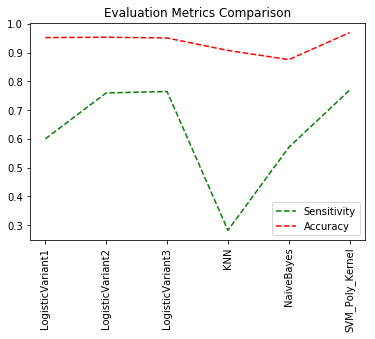

In [137]:
plt.plot(Comparison.index,Comparison.Sensitivity, 'g--', label='Sensitivity')
plt.plot(Comparison.index,Comparison.Accuracy, 'r--', label='Accuracy')
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.title("Evaluation Metrics Comparison")

In this project, the major gain for the company would be if the model accurately predicts the liability customers who can be converted to personal loan customers. Since the distribution of the target variable is highly skewed in favor of the minority class (i.e. customers who did not turn into personal loan customer in the previous campaign), accuracy as a metric can be very misleading. Hence a more apt mode of comparison of models tried would be AUC and/or Sensitivity (for Class 1). Logistic Regression Variant 2 and 3 have comaparatively higher AUCs and Sensitivity. The SVM model tried with polynomial kernel gave best Sensitivity and highest accuracy score. It may have given better AUC also considering the combination of highest accuracy and highest sensitivity. I could not get it because probability calculation was too much time to be processed. In the absence of SVM results, I would choose Logistic Regression variant 2 or 3 as my final model. The additional advantage with it is that, we get to know the co-efficients of each variable which gives high degree of interpretability of the model used. We can know, for each unit change in the independent variable, what is the shift in the probability of the customer becoming personal customer. We get the odds ratio of all independent variables.